In [118]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [119]:
#Read CSV file
linkedin = pd.read_csv("Connections.csv")
linkedin.head()

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Hussain,Lokhandwala,NaN,KPMG,Virtual Internship,06-09-2020
1,Manik,Arneja,NaN,NaN,NaN,06-09-2020
2,Devendra,Kumar,NaN,Amdocs,Data Engineer,06-09-2020
3,Kartik,Kohli,NaN,UnitedHealth Group,Data Scientist,05-09-2020
4,Vaibhav,Arora,NaN,"Indian Institute of Technology, Kanpur",Computer vision-Project Intern,05-09-2020


In [120]:
#Look at dataframe details
linkedin.info()
#Find total number of rows
total_num_con = linkedin.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     7724 non-null   object
 1   Last Name      7724 non-null   object
 2   Email Address  129 non-null    object
 3   Company        7341 non-null   object
 4   Position       7348 non-null   object
 5   Connected On   7793 non-null   object
dtypes: object(6)
memory usage: 365.4+ KB


In [121]:
#Drop NA values from 'Position' & 'Connected On' columns
linkedin.dropna(subset=['Position','Connected On'],inplace=True)
#Find number of rows removed
print('Total number of rows removed: {}'.format(total_num_con - linkedin.shape[0]))

Total number of rows removed: 445


In [122]:
#Convert 'Connected On' column to datetime
linkedin['Connected On'] = pd.to_datetime(linkedin['Connected On'])
#Check datatypes of columns
linkedin.dtypes

First Name               object
Last Name                object
Email Address            object
Company                  object
Position                 object
Connected On     datetime64[ns]
dtype: object

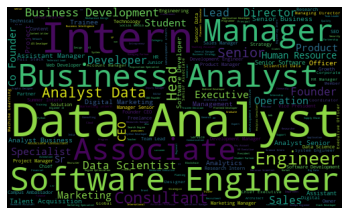

In [140]:
#Word cloud for 'Position' column
all_positions = ' '.join([pos for pos in linkedin['Position']])
positions_wordcloud = WordCloud(width=500, height=300, max_font_size=100).generate(all_positions)
plt.imshow(positions_wordcloud)
plt.axis("off")
plt.show()

In [124]:
#Highest number of connections made and when?
linkedin.groupby('Connected On')['First Name'].count().sort_values(ascending=False).head(1)

Connected On
2018-08-11    444
Name: First Name, dtype: int64

In [125]:
#My first connection?
linkedin.tail(1)

,First Name,Last Name,Email Address,Company,Position,Connected On
7792,Soumik,Mallik,NaN,Larsen & Toubro Infotech Ltd (LTI),Undergraduate Intern,2016-11-17


In [126]:
#Extract month from 'Connected On' column
linkedin['month'] = linkedin['Connected On'].dt.month
#Extract year from 'Connected On' column
linkedin['year'] = linkedin['Connected On'].dt.year
#View head
linkedin.head()

,First Name,Last Name,Email Address,Company,Position,Connected On,month,year
0,Hussain,Lokhandwala,NaN,KPMG,Virtual Internship,2020-06-09,6,2020
2,Devendra,Kumar,NaN,Amdocs,Data Engineer,2020-06-09,6,2020
3,Kartik,Kohli,NaN,UnitedHealth Group,Data Scientist,2020-05-09,5,2020
4,Vaibhav,Arora,NaN,"Indian Institute of Technology, Kanpur",Computer vision-Project Intern,2020-05-09,5,2020
6,Er Ashish,Korat,NaN,AARK Infosoft Pvt. Ltd (AIPL),Software Developer,2020-05-09,5,2020


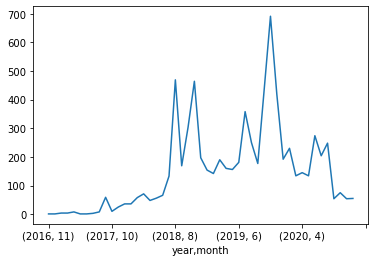

In [134]:
#Number of LinkedIn connections made by Year and Month
linkedin.groupby(['year','month'])['First Name'].count().plot()

In [142]:
#Which organisations do I have most connections from?
linkedin.dropna(subset=['Company'],inplace=True)
linkedin.groupby('Company')['First Name'].count().sort_values(ascending=False).head(5)

Company
Merkle Sokrati               81
Manipal University Jaipur    72
Amazon                       63
Udaan.com                    55
Simplilearn                  48
Name: First Name, dtype: int64